# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Modules" data-toc-modified-id="Python-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python-Modules</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Transparency" data-toc-modified-id="Transparency-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transparency</a></span></li><li><span><a href="#Comprehension" data-toc-modified-id="Comprehension-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comprehension</a></span><ul class="toc-item"><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cost Function</a></span><ul class="toc-item"><li><span><a href="#General-informations" data-toc-modified-id="General-informations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>General informations</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Bonus-(for-Oliver)" data-toc-modified-id="Bonus-(for-Oliver)-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Bonus (for Oliver)</a></span></li></ul></li></ul></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Backpropagation</a></span><ul class="toc-item"><li><span><a href="#Derivatives" data-toc-modified-id="Derivatives-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Derivatives</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Output-layer" data-toc-modified-id="Output-layer-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Output layer</a></span></li><li><span><a href="#Hidden-layer" data-toc-modified-id="Hidden-layer-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Hidden layer</a></span></li><li><span><a href="#Input-layer" data-toc-modified-id="Input-layer-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Input layer</a></span></li><li><span><a href="#Gradient" data-toc-modified-id="Gradient-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Gradient</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Boundaries-and-noise" data-toc-modified-id="Boundaries-and-noise-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Boundaries and noise</a></span><ul class="toc-item"><li><span><a href="#Why-is-the-boundaries-of-your-plot-between-[-1,0]" data-toc-modified-id="Why-is-the-boundaries-of-your-plot-between-[-1,0]-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Why is the boundaries of your plot between [-1,0]</a></span></li><li><span><a href="#Why-it-is-so-noisy" data-toc-modified-id="Why-it-is-so-noisy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Why it is so noisy</a></span></li><li><span><a href="#Reducing-the-noise" data-toc-modified-id="Reducing-the-noise-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Reducing the noise</a></span></li><li><span><a href="#The-difference-to-a-usual-plot-of-a-loss-function" data-toc-modified-id="The-difference-to-a-usual-plot-of-a-loss-function-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The difference to a usual plot of a loss function</a></span></li></ul></li><li><span><a href="#Different-learning-rates" data-toc-modified-id="Different-learning-rates-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Different learning rates</a></span></li><li><span><a href="#Different-batch-sizes" data-toc-modified-id="Different-batch-sizes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Different batch-sizes</a></span></li></ul></div>

# Requirements
## Python-Modules

In [1]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [2]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(
    one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Transparency

0 0.9448
1 0.9562
2 0.9616
3 0.9653
4 0.9677
5 0.9694
6 0.9711
7 0.972
8 0.9725
9 0.974
10 0.9743
11 0.9747
12 0.9759
13 0.9763
14 0.9765
15 0.9769
16 0.9771
17 0.9774
18 0.9772
19 0.9774


Text(0.5,0,'iterations')

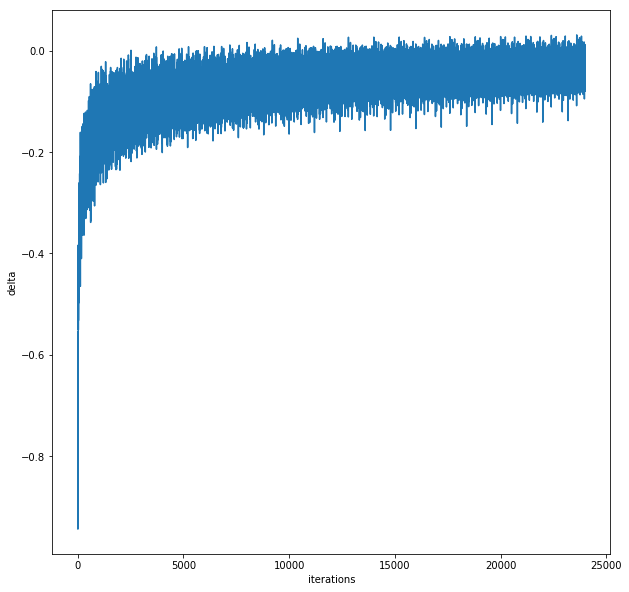

In [3]:
# delta_hist stores the delta value calculated on the outpur layer during each iteration of our function grad.
#
# delta is the difference between the predicted layer and the actual label
delta_hist = []


def feed_forward(X, weights):
    """
    calculates the forward path of our neural network with RELU as activation function of every neuron

    Args:
        X: input data of our neural network (in our cases - our images)
        weights: the learnable parametre of our network

    Returns:
        a matrix which represents the forward path
    """
    a = [X]
    for w in weights:
        # the last item of our list is always the latest item that was calculated
        # which is why a[-1] is always called
        a.append(np.maximum(a[-1].dot(w), 0))
    return a


def grads(X, Y, weights):
    """
    calculates the gradient of our network by using a algorithm called backpropagation

    Args:
        X: input data of our neural network (in our cases - our images)
        Y: labels of our input data
        weights: the learnable parametre of our network

    Returns:
        the gradient of our loss function
    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)

    # calculating the difference and appending it to the list
    delta = a[-1] - Y
    delta_hist.append(np.sum(delta*Y)/len(X))

    # calculating the gradient
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)


# To test out weather our implementation works, we are going to first initialize our neural network with
# 3 layers with 784 input neurons, 200 hidden neurons and 10 output neurons.
# The 784 input neurons stand for every pixel of one image (every image has a resolution of 28x28) and
# the 10 output neurons stands for every possible numbber the image could stand for (every image could be 0-9).
# We also set up variables for our train and test dataset
trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(
    *w) * 0.1 for w in [(784, 200), (200, 100), (100, 10)]]


# After initializing our network we are going to train our network and then see how accurate it performs.
# The number of epochs stands for the amount of times we are going to repeat this/repeat the training.
#
# In order to train our network/minimize our loss we use stochastical gradient descent method 
# which is the same as gradient descent but only uses just a part of the whole data
# - a so called "mini-batch" - to calculate the gradient for each iteration.
#
# Gradient descent tries to minimize our loss function
# by substracting our current weights with the gradient of our loss function.
# so we have W_new = W_old - grad(L)*learning_rate
num_epochs, batch_size, learn_rate = 20, 50, 0.1
for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        # creating a mini-batch with the size of batch_size
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)

    # prints our accuracy on the test data after training
    print(i, np.mean(prediction_test == np.argmax(teY, axis=1)))

# To actually see how good our neural network learns we can plot our variable delta_hist which bascially stores
# every delta in each epoch/generation.
plt.figure(figsize=(10, 10))
plt.plot(delta_hist)
plt.ylabel('delta')
plt.xlabel('iterations')

## Comprehension
### Cost Function
#### General informations
We know that our activation function of every neuron is a ReLU function. In general the ReLU function is defined as
$$
ReLU(x) = \begin{cases}
  0, & \text{if } x < 0, \\
  x, & \text{otherwise}.
\end{cases}
$$

with its derivative (which ignores the discontinuity at $x=0$, where the gradient is not strictly defined, but that is not a practical concern for neural networks). I am also going to call the derivative step because it is a step function and it is going to reduce the amount I have to type
$$
ReLU^\prime(x) = \frac{d}{dx} ReLU(x) = \begin{cases}
  0, & \text{if } x < 0, \\
  1, & \text{otherwise}.
\end{cases}
$$

Now when we look at our neural network we have to add indexes to separate every layer from each other. I´ll use $k$ which stands for the $k$-th layer of our network.<br>
$$
a^{k} = ReLU(W^{k}a^{k-1} )\tag 1
$$


We also know that the cost function of our network is 
$$
C = \frac{1}{n} \sum_x C_x \tag{3b}
$$
$$
\begin{eqnarray}
  C_x = \frac{1}{2} \|y-a^K\|^2
\tag{3c}\end{eqnarray}
$$
with $K$ beeing the number of layers in the network

#### Implementation 
Our network actually does not implement the cost function. When we calculate the gradient we store a ``delta``value which is ``delta = (a[-1] - Y) * Y / len(X)``. ``delta`` is bascially the difference between the predicted layer and the actual layer divided by the amount of data we have

#### Bonus (for Oliver)
The ReLU function is continuous everywhere since the formulas match up at x=0 and the slope of $ReLU(x)$ for all $x<0$ is clearly 0 and the slope of $ReLU(x)$ for all $x>0$ is clearly 1. 

If you try to compute the derivative of $ReLU(x)$ at $x=0$, $f'(0)=\lim\limits_{h \to 0} \frac{f(0+h)-f(0)}{h} = \lim\limits_{h \to 0} \frac{f(h)}{h}$ you'll get the limit from the left is 0 and from the right is 1. 

Thus the derivative does not exist at $x=0$. So max(0,x) is continuous but isn't differentiable (at x=0).

``Source:https://math.stackexchange.com/questions/1329252/is-max0-x-a-differentiable-function``

## Backpropagation

Before we start, we´ll have to define the error in the k-th layer as
$$
\delta ^ { k} \equiv \frac { \partial C } { \partial a ^ { k } }
$$

### Derivatives
With backpropagation we want to calculate every partial derivative of our cost function (in order to create our gradient). In our case I am just going to note them here. A full proof is available at [Michael Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html) and [brilliant.org](https://brilliant.org/wiki/backpropagation/)

$$
 \frac { \partial C } { \partial w^ { k } } = a ^ { k-1} \delta ^ { k} \tag 4
$$

$$
\delta ^ { K } = \left( a ^ { K } - y \right) \odot ReLU ^ { \prime } \left( a ^ { K } \right) \tag 5
$$

$$
\delta ^ { k } = \left( \left( w ^ { k + 1} \right) ^ { T } \delta ^ { k + 1} \right) \odot ReLU ^ { \prime } \left( a ^ { k } \right) \tag 6
$$

### Example
Lets say our neural network has 3 layers and we want to calculate the gradient. With that in mind we would start with the last layer and work down to the first layer.

#### Output layer
$$
 \frac { \partial C } { \partial w^ { 3 } } = a ^ { 2} \delta ^ { 3} 
$$

$$
\delta ^ { 3 } = \left( a ^ { 3 } - y \right) \odot ReLU ^ { \prime } \left( a ^ { 3 } \right)
$$

$$
\Rightarrow \frac { \partial C } { \partial w^ { 3 } } = a ^ { 2} \left( \left( a ^ { 3 } - y \right) \odot ReLU ^ { \prime } \left( a ^ { 3 } \right)\right)
$$

#### Hidden layer
$$
 \frac { \partial C } { \partial w^ { 2 } } = a ^ { 1} \delta ^ { 2} 
$$

$$
\delta ^ { 2 } = \left( \left( w ^ { 3} \right) ^ { T } \delta ^ { 3} \right) \odot ReLU ^ { \prime } \left( a ^ { 2 } \right) = \\
\left( \left( w ^ { 3} \right) ^ { T } \left( \left( a ^ { 3 } - y \right) \odot ReLU ^ { \prime } \left( a ^ { 3 } \right) \right)\right) \odot ReLU ^ { \prime } \left( a ^ { 2 } \right)
$$

$$
\Rightarrow  \frac { \partial C } { \partial w^ { 2 } } = a ^ { 1} 
\left( \left( w ^ { 3} \right) ^ { T } \left( \left( a ^ { 3 } - y \right) \odot ReLU ^ { \prime } \left( a ^ { 3 } \right) \right)\right) \odot ReLU ^ { \prime } \left( a ^ { 2 } \right)
$$

#### Input layer
$$
 \frac { \partial C } { \partial w^ { 1 } } = a ^ { 0} \delta ^ { 1}  = x_{input} \space \delta ^ { 1} 
$$

$$
\delta ^ { 1 } = \left( \left( w ^ { 2} \right) ^ { T } \delta ^ {2} \right) \odot ReLU ^ { \prime } \left( a ^ { 1 } \right) = \\
\left( \left( w ^ { 2} \right) ^ { T }\left( \left( \left( w ^ { 3} \right) ^ { T } \delta ^ { 3} \right) \odot ReLU ^ { \prime } \left( a ^ { 2 } \right)\right) \right) \odot ReLU ^ { \prime } \left( a ^ { 1} \right) = .....
$$

#### Gradient
$$grad(C) = \frac{1}{n}\left(\begin{array}{c} \frac { \partial C } { \partial w^ { 1 } } \\  \frac { \partial C } { \partial w^ { 2 } }  \\ \frac { \partial C } { \partial w^ { 3 } }  \end{array}\right)$$

### Implementation
derivative of the output layer<br>
``grads[-1] = a[-2].T.dot(a[-1] - Y)``  <br>

derivative of the hidden and input layers<br>
``for i in range(len(a)-2, 0, -1):
    delta = (a[i] > 0) * delta.dot(self.weights[i].T)
    grads[i-1] = a[i-1].T.dot(delta)`` <br>
    
$\frac{1}{n}$ at the end<br>
``grads = grads / len(X)``

## Boundaries and noise

### Why is the boundaries of your plot between [-1,0]
We know that we always add to the list $delta =\frac{ (a^K-y)\odot y}{n}$ which is equivalent to $delta = \frac{a^K_i - y_i}{n}$ with $i$ beeing the $i-th$ element of our vectors.<br>
We also know that: 
- $a^K_i$ is in between $[0,1]$
- $y_i$ is either $0$ or $1$
- so $a^K_i - y_i$ has the $max$ value of $0$ and the $min$ value of -1 

### Why it is so noisy

I think the reason for our noise is that our optimizer implements SGD as method to reduce our loss of our network. SGD calculates in every iteration the gradient of our cost function based on a mini-batch and not on the full-batch which is why the gradient is not constant and changing direction in every iteration (could be possible that the gradient takes on one mini-batch a positive direction and in the other mini-batch a negative direction). Since our gradient is not constant in every iteration our delta is neither too. Our weights could be - for example we could have a situation where we have a delta of 0.1 in iteration 25, delta of 0.5 in iteration 26 and in iteration 27 again 0.1.

### Reducing the noise

I think by optimizing the ``learning rate```
 and enlarging the ``batch_size`` it would be possible to reduce the noise

### The difference to a usual plot of a loss function

The difference is that in our loss function, we actually try to maximize our loss so our loss gets bigger and bigger

# Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

epoch: 0 , accuracy: 0.8633 , loss: 1.1129
epoch: 1 , accuracy: 0.8948 , loss: 0.8578
epoch: 2 , accuracy: 0.9114 , loss: 0.72165
epoch: 3 , accuracy: 0.9197 , loss: 0.6734
epoch: 4 , accuracy: 0.9284 , loss: 0.59425
epoch: 5 , accuracy: 0.9329 , loss: 0.57355
epoch: 6 , accuracy: 0.9363 , loss: 0.5412
epoch: 7 , accuracy: 0.9404 , loss: 0.5228
epoch: 8 , accuracy: 0.943 , loss: 0.5053
epoch: 9 , accuracy: 0.9461 , loss: 0.47805
epoch: 10 , accuracy: 0.9485 , loss: 0.45745
epoch: 11 , accuracy: 0.95 , loss: 0.44515
epoch: 12 , accuracy: 0.9514 , loss: 0.4391
epoch: 13 , accuracy: 0.9523 , loss: 0.43945
epoch: 14 , accuracy: 0.9532 , loss: 0.4289
epoch: 15 , accuracy: 0.9541 , loss: 0.4196
epoch: 16 , accuracy: 0.9546 , loss: 0.4151
epoch: 17 , accuracy: 0.9553 , loss: 0.4116
epoch: 18 , accuracy: 0.9562 , loss: 0.405
epoch: 19 , accuracy: 0.9573 , loss: 0.39455


Text(0.5,0,'iterations')

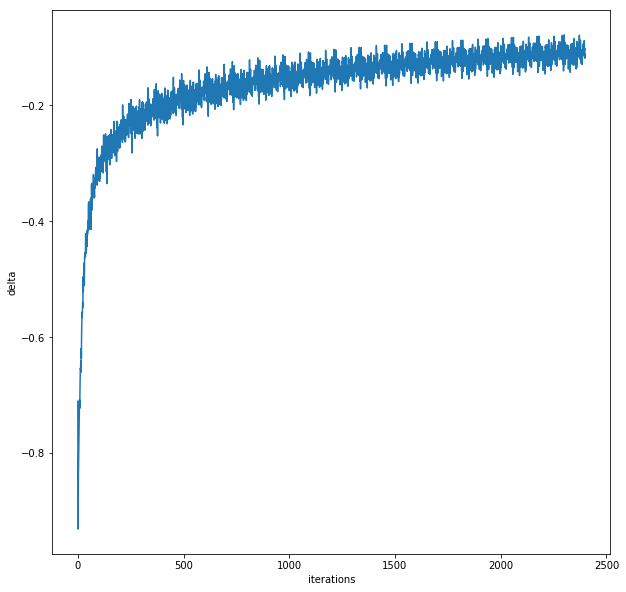

In [4]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        """
        initializes the network by creating a weight matrix with random values out of the list layers
        and a empty list for our deltas

        Args:
            layers: a list consisting of tupels which represents the dimension of every weight matrix of every layer
            e.g. if layer is [(784, 200), (200, 100)] then the weight of the first layer
            would be (784,200), the second (200,100)
        """
        self.weights = [np.random.randn(*w) * 0.1 for w in layers]
        self.delta_hist = []

    def forward(self, data):
        """
        calculates the forward path of our neural network with RELU as activation function of every neuron

        Args:
            data: input data of our neural network (in our cases - our images)

        Returns:
            a matrix which represents the forward path
        """

        a = [data]
        for w in self.weights:
            a.append(np.maximum(a[-1].dot(w), 0))
        return a

    def backward(self, X, Y):
        """
        calculates the gradient of our network by using a algorithm called backpropagation

        Args:
            X: input data of our neural network (in our cases - our images)
            Y: labels of our input data

        Returns:
            the gradient of our loss function
        """
        grads = np.empty_like(self.weights)
        a = self.forward(X)

        # calculating the difference and appending it to the list
        delta = a[-1] - Y
        self.delta_hist.append(np.sum(delta*Y)/len(X))

        # calculating the gradient
        grads[-1] = a[-2].T.dot(delta)
        for i in range(len(a)-2, 0, -1):
            delta = (a[i] > 0) * delta.dot(self.weights[i].T)
            grads[i-1] = a[i-1].T.dot(delta)
        return grads / len(X)

    def predict(self, data):
        """
        this method is used to make a prediction on a dataset/batch

        Arg:
            data: data the network should predict

        Returns:
            a matrix with every prediction our network made
        """
        return np.argmax(self.forward(data)[-1], axis=1)


class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        """
        initializes the optimizer

        Args:
            layers: FullyConnectedNetwork object
            train_data: trainings data as np array
            train_label: labels of train data as np array
            test_data: test data as np array
            test_label: labels of test data as np array
            epochs: the amount of epochs the optimizer run
            batch_size: the size of a mini batch the optimizer will use
            leraning_rate: a scalar that will be multiplied with the gradient
        """
        self.network = network
        self.trX, self.trY, self.teX, self.teY = train_images, train_labels, test_images, test_labels
        self.batch_size, self.num_epochs, self.learning_rate = batch_size, epochs, learning_rate

    def sgd(self,verbose=True):
        """
        The optimizer uses stochastical gradient descent method to train the network.
        
        Args:
            verbose: if it´s set it prints out epoch and accuracy
        """
        for i in range(self.num_epochs):
            for j in range(0, len(self.trX), self.batch_size):
                X, Y = self.trX[j:j +
                                self.batch_size], self.trY[j:j+self.batch_size]
                self.network.weights -= self.learning_rate * \
                    self.network.backward(X, Y)
            if (verbose == True):
                prediction_test = self.network.predict(self.teX)
                actual_test = np.argmax(teY, axis=1)
                loss = np.sum(((prediction_test-actual_test)**2)/2)/len(teY)
                accuracy = np.mean(prediction_test == actual_test)
                print("epoch:",i,", accuracy:", accuracy, ", loss:",loss)


# Following code should run:
mnist_NN = FullyConnectedNetwork([(784, 200), (200, 100), (100, 10)])
epochs, batch_size, learning_rate = 20, 500, 0.1
opt = Optimizer(mnist_NN, train_images, train_labels, test_images,
                test_labels, epochs, batch_size, learning_rate)
opt.sgd()
plt.figure(figsize=(10, 10))
plt.plot(mnist_NN.delta_hist)
plt.ylabel('delta')
plt.xlabel('iterations')

# Experiential
Lets see weather I was wrong with my answers about solutions to reduce the noise

## Different learning rates

/home/s0558366/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply
/home/s0558366/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater


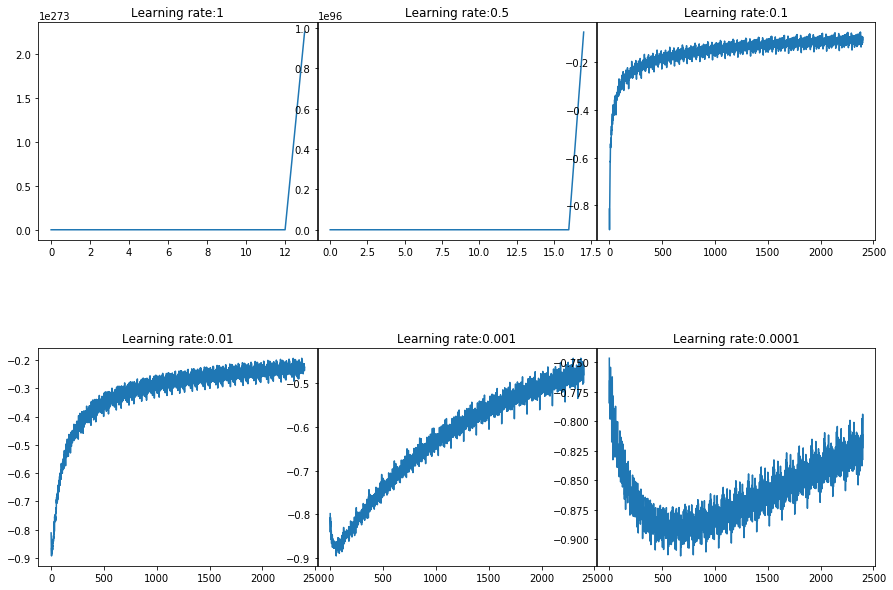

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=.5, wspace=.001)
axs = axs.ravel()
rates = [1, 0.5, 0.1, 0.01, 0.001, 0.0001]
epochs, batch_size = 20, 500

for i, j in enumerate(rates):
    mnist_NN = FullyConnectedNetwork([(784, 200), (200, 100), (100, 10)])
    opt = Optimizer(mnist_NN, train_images, train_labels, test_images,
                    test_labels, epochs, batch_size, j)
    opt.sgd(False)
    axs[i].plot(mnist_NN.delta_hist)
    axs[i].set_title("Learning rate:" + str(j))
plt.show()

## Different batch-sizes

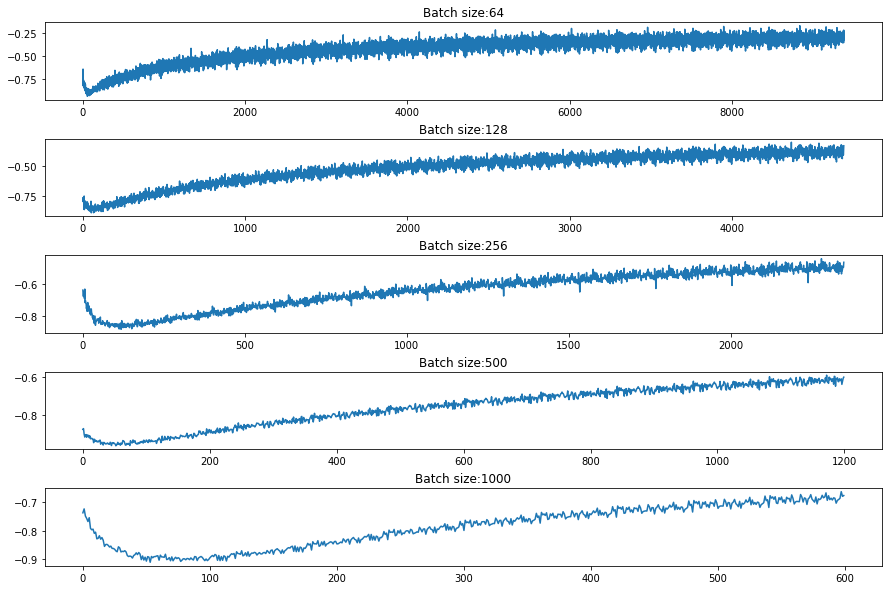

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(15, 30))
fig.subplots_adjust(hspace=.5, wspace=.001)
axs = axs.ravel()
batch_size = [64,128,256, 500, 1000]
epochs, learning_rate = 10, 0.001

for i, j in enumerate(batch_size):
    mnist_NN = FullyConnectedNetwork([(784, 200), (200, 100), (100, 10)])
    opt = Optimizer(mnist_NN, train_images, train_labels, test_images,
                    test_labels, epochs, j, learning_rate)
    opt.sgd(False)
    axs[i].plot(mnist_NN.delta_hist)
    axs[i].set_title("Batch size:" + str(j))
plt.show()